# EDA

In [ ]:
import pandas as pd
import numpy as np

In [2]:
medals = pd.read_excel("Olympics2021\\medals.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [6]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


#### *Note*:
Its a good practice to start by exploring numerical data in the dataset. 

Types of Numerical Data:
1. Continuous - anything that can be divided infinitismally eg: weight, age      
2. Discrete - numerical data that cannot be divided eg:date of birth

Types of Categorical Data:
1. Binary - two categories eg: boolean yes/no
2. Ordinal - categories where the order matters eg: sizes - small, medum, large 

## Estimates of Location - (where is your data?)

In [5]:
#normal mean
medals["Total"].mean()

11.612903225806452

####  Note:
simple mean is not a good representative as it ignores the details for example, salaries and ages data, a mean does not take into account that older people with lot of experience get paid much higher than freshers who are younger

Weighted mean is therefore preferred - it accounts for nuances by reducing weight of data that is less important and vice versa. simple example, grades based on weightage for various submissions assignment vs test vs lab etc

In [8]:
#weighted mean- average gold for total number of medals out there
np.average(medals["Gold"],weights=medals["Total"])

14.743518518518519

In [10]:
np.average(medals["Total"],weights=medals["Gold"])

46.832352941176474

### Note: 
Mean is sensitive to outlier - inorder to make it **robust** we can used trim mean to exclude extreme values 

**A robust measure is one that is insensitive to outliers**

In [11]:
#trimmed mean
from scipy.stats import trim_mean

In [16]:
trim_mean(medals["Total"],0.1) #trimmed top bottom 10%

6.8933333333333335

In [17]:
list(medals["Total"])

[113,
 88,
 58,
 65,
 71,
 46,
 36,
 33,
 37,
 40,
 24,
 21,
 20,
 15,
 20,
 20,
 14,
 11,
 10,
 8,
 9,
 17,
 9,
 13,
 11,
 8,
 7,
 9,
 7,
 6,
 5,
 5,
 8,
 12,
 13,
 4,
 4,
 3,
 4,
 4,
 3,
 2,
 2,
 19,
 7,
 4,
 4,
 7,
 6,
 4,
 4,
 3,
 7,
 6,
 5,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 5,
 7,
 5,
 4,
 3,
 4,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### Median:
Median is the middle value when the data is placed in an order, ascending/ descending

Median can be representative/ robust for highly skewed values - not sensitive to outliers.
For example - income values distribution - median would be more representative of what an average employee makes than mean

In [15]:
medals["Total"].median()

4.0

### Weighted Median:
Is a value central like median when the data is ordered meeting a condition that the sum of all values to the left of the median value is equal to sum of all the values to the right of the median value

In [21]:
def weighted_median(df,median_col,weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >=cutoff][median_col].iloc[0]

In [22]:
weighted_median(medals,"Total","Gold")

40

In [23]:
medals_sorted= medals.sort_values("Total")

In [31]:
cumsum = medals_sorted["Gold"].cumsum()
cumsum

92      0
62      1
76      1
77      1
78      1
     ... 
2     221
3     243
4     263
1     301
0     340
Name: Gold, Length: 93, dtype: int64

In [29]:
medals_sorted["Gold"].sum()/2

170.0

In [34]:
medals_sorted[cumsum>170]["Total"].iloc[0]

40

### Percentiles 
Generally used to see top quater / bottom quater percentiles 

In [35]:
# 3rd quarter of data or 75th percentile
q3 = np.percentile(medals["Total"],75)

In [36]:
q3

11.0

In [37]:
medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability ( Dispersion metrics)

In [38]:
from statistics import variance

In [39]:
variance(medals["Total"])

364.47896213183736

In [40]:
variance(medals["Gold"])

49.315100514259

In [41]:
from statistics import stdev

In [42]:
stdev(medals["Total"]) #square root of variance - to bring it to scale of data

19.091332120411014

In [43]:
np.sqrt(variance(medals["Total"]))

19.091332120411014

### Mean Absolute deviation ( L1 Norm or Manhattan Norm)

In [44]:
## gives how far is something from its mean
from numpy import absolute, mean

In [45]:
mean(absolute(medals["Total"] - mean(medals["Total"])))

11.602497398543184

Median absolute deviation

In [47]:
from numpy import median
median(absolute(medals["Total"] - median(medals["Total"])))

3.0

Interquartile distance - is the range of middle 50% of data

In [48]:
q3,q1 = np.percentile(medals["Total"],[75,25])

In [49]:
iqr = q3-q1

In [50]:
iqr

9.0

## Exploring Data Distribution
Box plots and percentiles 

<AxesSubplot:>

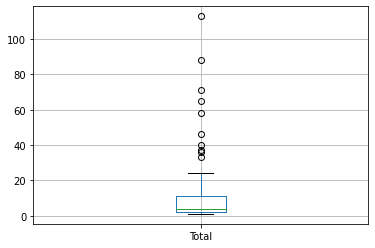

In [55]:
medals.boxplot(column="Total",by=None,ax=None)

plot above indicates the outlier at around 39 meaning anything above 39 is an outlier 

plots are more even for a normally distributed data

<AxesSubplot:>

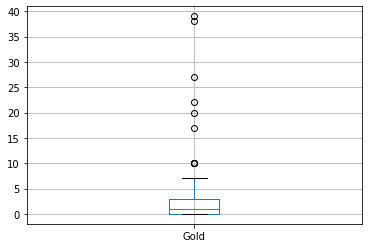

In [56]:
medals.boxplot(column="Gold",by=None,ax=None) # outlier mark is at 10

## Frequency tables and histograms

In [59]:
#frequency table
frequency_table = medals.copy()
frequency_table["freq"]=pd.cut(medals["Total"],50)
frequency_table

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,freq
0,1,United States of America,39,41,33,113,1,"(110.76, 113.0]"
1,2,People's Republic of China,38,32,18,88,2,"(86.12, 88.36]"
2,3,Japan,27,14,17,58,5,"(57.0, 59.24]"
3,4,Great Britain,22,21,22,65,4,"(63.72, 65.96]"
4,5,ROC,20,28,23,71,3,"(70.44, 72.68]"
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,"(0.888, 3.24]"
89,86,Grenada,0,0,1,1,77,"(0.888, 3.24]"
90,86,Kuwait,0,0,1,1,77,"(0.888, 3.24]"
91,86,Republic of Moldova,0,0,1,1,77,"(0.888, 3.24]"


In [61]:
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(0.888, 3.24]",34
1,"(3.24, 5.48]",18
2,"(5.48, 7.72]",9
3,"(7.72, 9.96]",7
4,"(9.96, 12.2]",4
5,"(12.2, 14.44]",3
6,"(14.44, 16.68]",1
7,"(16.68, 18.92]",1
8,"(18.92, 21.16]",5
9,"(21.16, 23.4]",0


(array([47., 18.,  7.,  4.,  5.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.]),
 array([  1.        ,   4.86206897,   8.72413793,  12.5862069 ,
         16.44827586,  20.31034483,  24.17241379,  28.03448276,
         31.89655172,  35.75862069,  39.62068966,  43.48275862,
         47.34482759,  51.20689655,  55.06896552,  58.93103448,
         62.79310345,  66.65517241,  70.51724138,  74.37931034,
         78.24137931,  82.10344828,  85.96551724,  89.82758621,
         93.68965517,  97.55172414, 101.4137931 , 105.27586207,
        109.13793103, 113.        ]),
 <BarContainer object of 29 artists>)

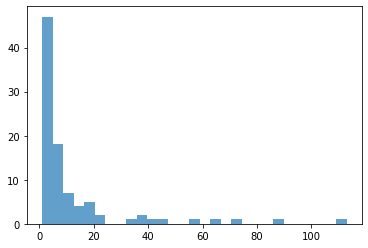

In [63]:
import matplotlib.pyplot as plt
plt.hist(x=medals["Total"],bins="auto",alpha=0.7)

## Statistical moments
**First Moment is Location** - Average of all data

**Second Moment is Variability** - how closely are values spread across the mean

**Third Moment is SKewness** - direction of the tail - visualised 

**Fourth Moment is Kurtosis** - propensity of the data to contain extreme values

<AxesSubplot:ylabel='Density'>

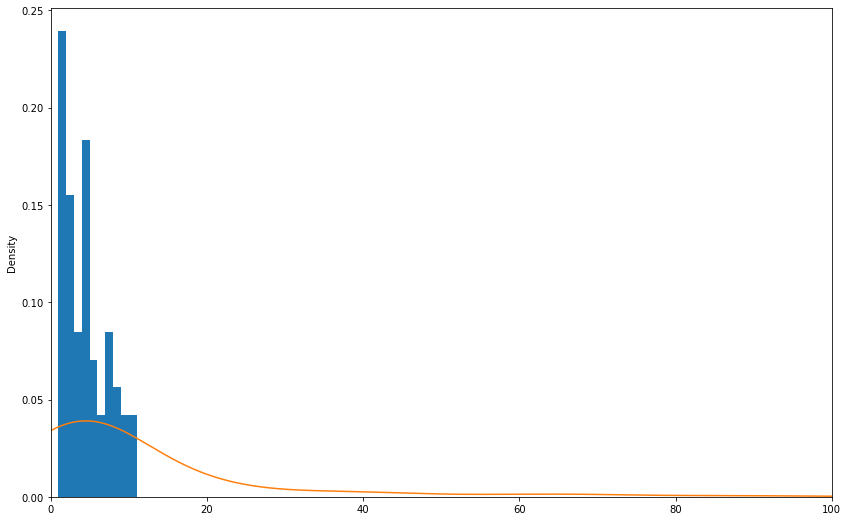

In [65]:
#density plot
plt.figure(figsize=(14,9))
ax = medals["Total"].plot.hist(density=True,xlim=[0,100],bins=range(1,12))
medals["Total"].plot.density(ax=ax)

## Exploring Binary and Categorical data

In [66]:
# Mode - value that appears most often
medals["Gold"].mode()

0    0
Name: Gold, dtype: int64

**Expected Value**: Sum of each value multiplied by the probability of its occurance. Example coin flip, expected value is total number of head flips * 0.5

**Hexagonal binning is useful to compare Numerics data vs numeric data**

<AxesSubplot:xlabel='Gold', ylabel='Total'>

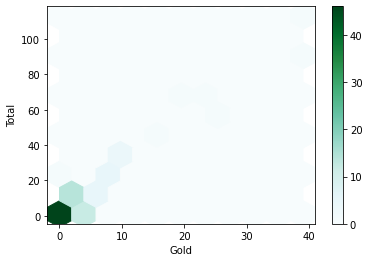

In [74]:
medals.plot.hexbin(x="Gold",y="Total",gridsize=10,sharex=False)

**contour plots**

In [75]:
import seaborn as sns

<AxesSubplot:xlabel='Gold', ylabel='Total'>

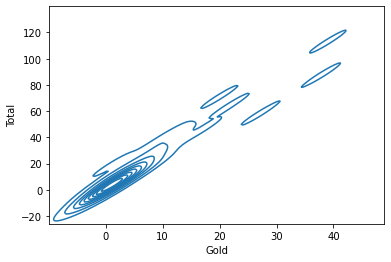

In [76]:
sns.kdeplot(x=medals["Gold"],y=medals["Total"])

**heat maps**

<AxesSubplot:>

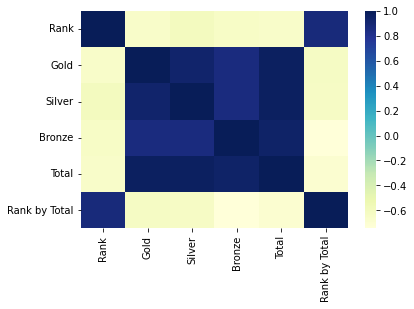

In [80]:
sns.heatmap(medals.corr(),cmap="YlGnBu")

**Contingency Table**

In [85]:
cross_tab = medals[["Gold","Silver"]].pivot_table(index="Silver",columns="Gold",aggfunc=lambda x:len(x),margins=True)

In [87]:
cross_tab.fillna(0,inplace=True)

In [88]:
cross_tab

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**Violinplot**

<AxesSubplot:xlabel='Gold'>

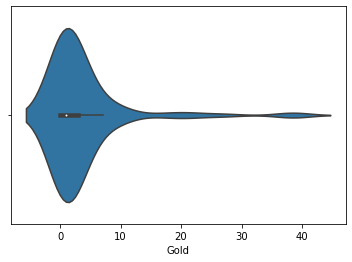

In [90]:
sns.violinplot(x=medals["Gold"]) # gives more info via showing the distribution

<AxesSubplot:xlabel='Gold'>

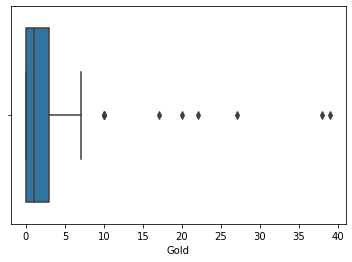

In [94]:
sns.boxplot(x=medals["Gold"])

<AxesSubplot:>

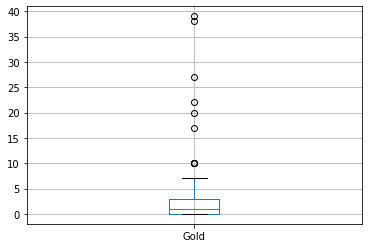

In [97]:
medals.boxplot(column="Gold") # gives an account of outliers

**Categorical heatmaps**

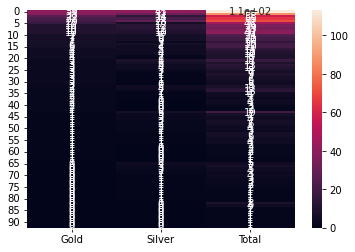

In [99]:
ax = sns.heatmap(medals[["Gold","Silver","Total"]], annot=True)